# Healthcare Data Exploration - Scotland A&E Analysis

This notebook provides a comprehensive exploratory data analysis of the Scottish healthcare dataset (FINAL_DATA_clean.csv). The analysis focuses on Accident & Emergency department performance, patient demographics, and hospital operations across Scotland.

**Dataset Overview**: Scottish A&E attendance data with demographic breakdowns, waiting times, and geographic information.

In [6]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
import os

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
warnings.filterwarnings('ignore')

# Set up plotting styles
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [7]:
# Load the clean healthcare dataset
file_path = r'c:\Users\glauc\Desktop\PHS\Operational_A-E\data\FINAL_DATA_clean.csv'

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print(f"✅ Dataset loaded successfully!")
    print(f"📊 Dataset shape: {df.shape}")
    print(f"📈 Rows: {df.shape[0]:,}")
    print(f"📋 Columns: {df.shape[1]}")
    print(f"💾 Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
else:
    print(f"❌ Error: File {file_path} not found.")

✅ Dataset loaded successfully!
📊 Dataset shape: (67704, 18)
📈 Rows: 67,704
📋 Columns: 18
💾 Memory usage: 54.22 MB
💾 Memory usage: 54.22 MB


In [8]:
# Dataset overview and basic information
print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"Dataset columns: {list(df.columns)}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nFirst 5 rows:")
print(df.head())
print(f"\nDataset info:")
df.info()

DATASET OVERVIEW
Dataset columns: ['Month', 'Country', 'HBT', 'TreatmentLocation', 'DepartmentType', 'NumberOfAttendancesAll', 'NumberWithin4HoursAll', 'NumberOver4HoursAll', 'HospitalName', 'Postcode', 'HealthBoard', 'HSCP', 'CouncilArea', 'IntermediateZone', 'DataZone', 'AllAges', 'Age', 'Population']

Data types:
Month                       int64
Country                    object
HBT                        object
TreatmentLocation          object
DepartmentType             object
NumberOfAttendancesAll      int64
NumberWithin4HoursAll       int64
NumberOver4HoursAll         int64
HospitalName               object
Postcode                   object
HealthBoard                object
HSCP                       object
CouncilArea                object
IntermediateZone           object
DataZone                   object
AllAges                   float64
Age                        object
Population                float64
dtype: object

First 5 rows:
    Month    Country        HBT Treatment

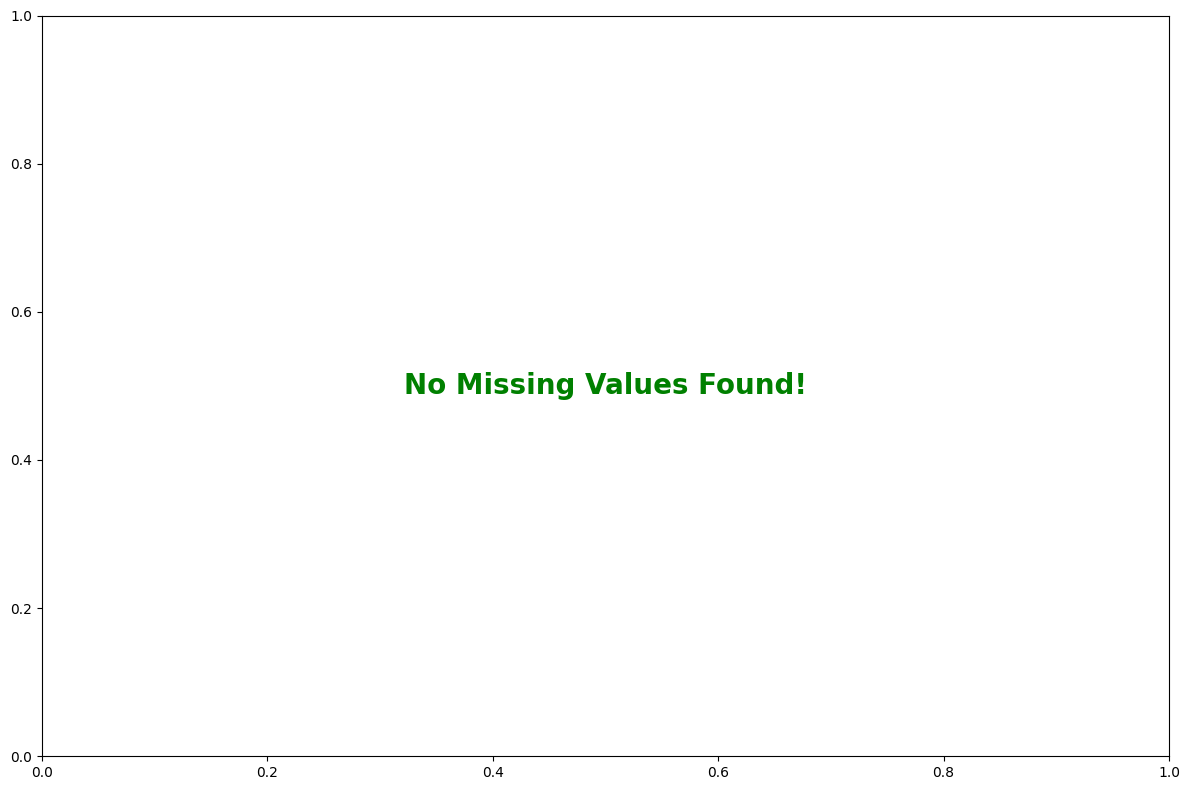

Missing values summary:
  ✅ No missing values found in the dataset!


In [9]:
# Missing values analysis visualization
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

plt.figure(figsize=(12, 8))
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percentage.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if not missing_df.empty:
    sns.barplot(data=missing_df, x='Missing_Count', y='Column', palette='Reds_r')
    plt.title('Missing Values by Column', fontsize=16, fontweight='bold')
    plt.xlabel('Number of Missing Values', fontsize=12)
    plt.ylabel('Columns', fontsize=12)
    
    # Add percentage labels
    for i, (count, pct) in enumerate(zip(missing_df['Missing_Count'], missing_df['Missing_Percentage'])):
        plt.text(count + max(missing_df['Missing_Count']) * 0.01, i, f'{pct:.1f}%', 
                va='center', fontsize=10)
else:
    plt.text(0.5, 0.5, 'No Missing Values Found!', 
             horizontalalignment='center', verticalalignment='center', 
             fontsize=20, fontweight='bold', color='green')
    plt.xlim(0, 1)
    plt.ylim(0, 1)

plt.tight_layout()
plt.show()

print(f"Missing values summary:")
if not missing_df.empty:
    for _, row in missing_df.iterrows():
        print(f"  {row['Column']}: {row['Missing_Count']:,} ({row['Missing_Percentage']:.1f}%)")
else:
    print("  ✅ No missing values found in the dataset!")

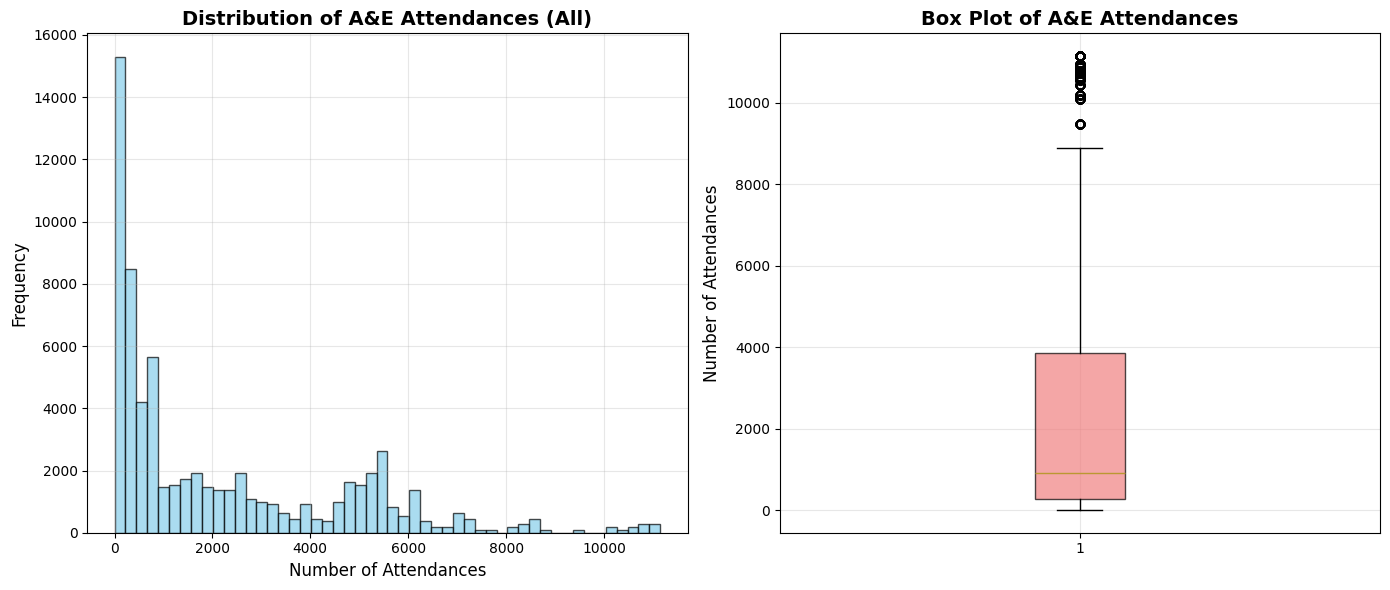

A&E Attendances Statistics:
  Mean: 2,192.66
  Median: 918.00
  Std Dev: 2,466.93
  Min: 1
  Max: 11,150
  Total Attendances: 148,452,122


In [10]:
# Distribution of Total A&E Attendances
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(df['NumberOfAttendancesAll'], bins=50, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Distribution of A&E Attendances (All)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Attendances', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(df['NumberOfAttendancesAll'], vert=True, patch_artist=True, 
           boxprops=dict(facecolor='lightcoral', alpha=0.7))
plt.title('Box Plot of A&E Attendances', fontsize=14, fontweight='bold')
plt.ylabel('Number of Attendances', fontsize=12)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"A&E Attendances Statistics:")
print(f"  Mean: {df['NumberOfAttendancesAll'].mean():,.2f}")
print(f"  Median: {df['NumberOfAttendancesAll'].median():,.2f}")
print(f"  Std Dev: {df['NumberOfAttendancesAll'].std():,.2f}")
print(f"  Min: {df['NumberOfAttendancesAll'].min():,}")
print(f"  Max: {df['NumberOfAttendancesAll'].max():,}")
print(f"  Total Attendances: {df['NumberOfAttendancesAll'].sum():,}")

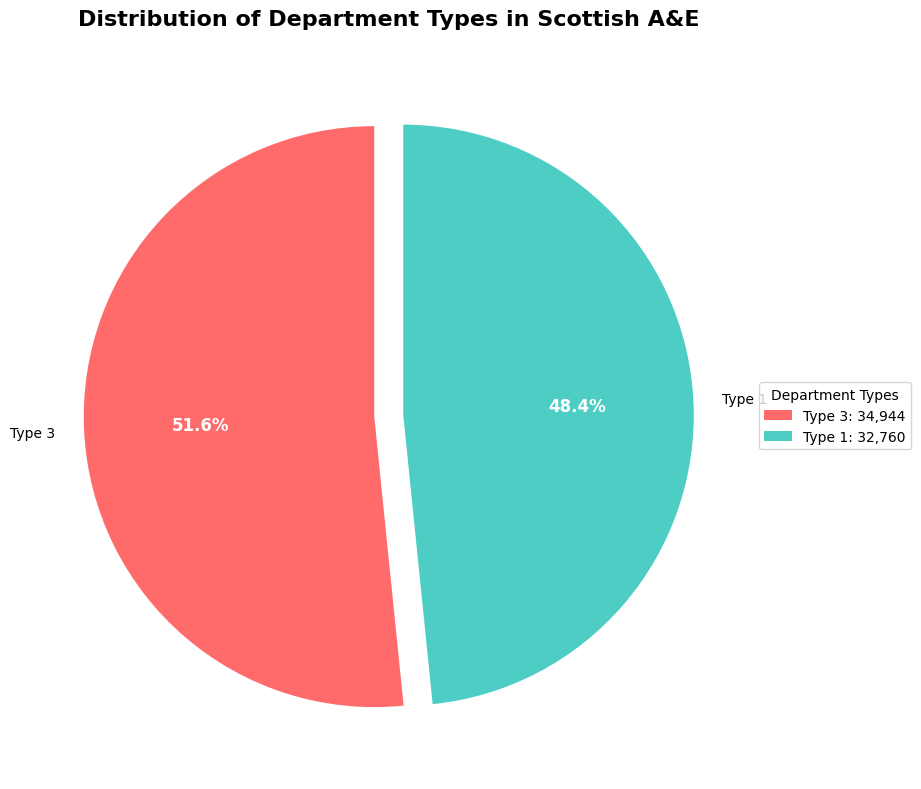

Department Type Breakdown:
  Type 3: 34,944 records (51.6%)
  Type 1: 32,760 records (48.4%)


In [11]:
# Department Type Distribution
dept_counts = df['DepartmentType'].value_counts()

plt.figure(figsize=(12, 8))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
wedges, texts, autotexts = plt.pie(dept_counts.values, labels=dept_counts.index, autopct='%1.1f%%', 
                                  startangle=90, colors=colors[:len(dept_counts)], 
                                  explode=[0.05] * len(dept_counts))

# Enhance the pie chart
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

plt.title('Distribution of Department Types in Scottish A&E', fontsize=16, fontweight='bold', pad=20)

# Add a legend with counts
legend_labels = [f'{dept}: {count:,}' for dept, count in dept_counts.items()]
plt.legend(wedges, legend_labels, title="Department Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

print(f"Department Type Breakdown:")
for dept, count in dept_counts.items():
    percentage = (count / dept_counts.sum()) * 100
    print(f"  {dept}: {count:,} records ({percentage:.1f}%)")

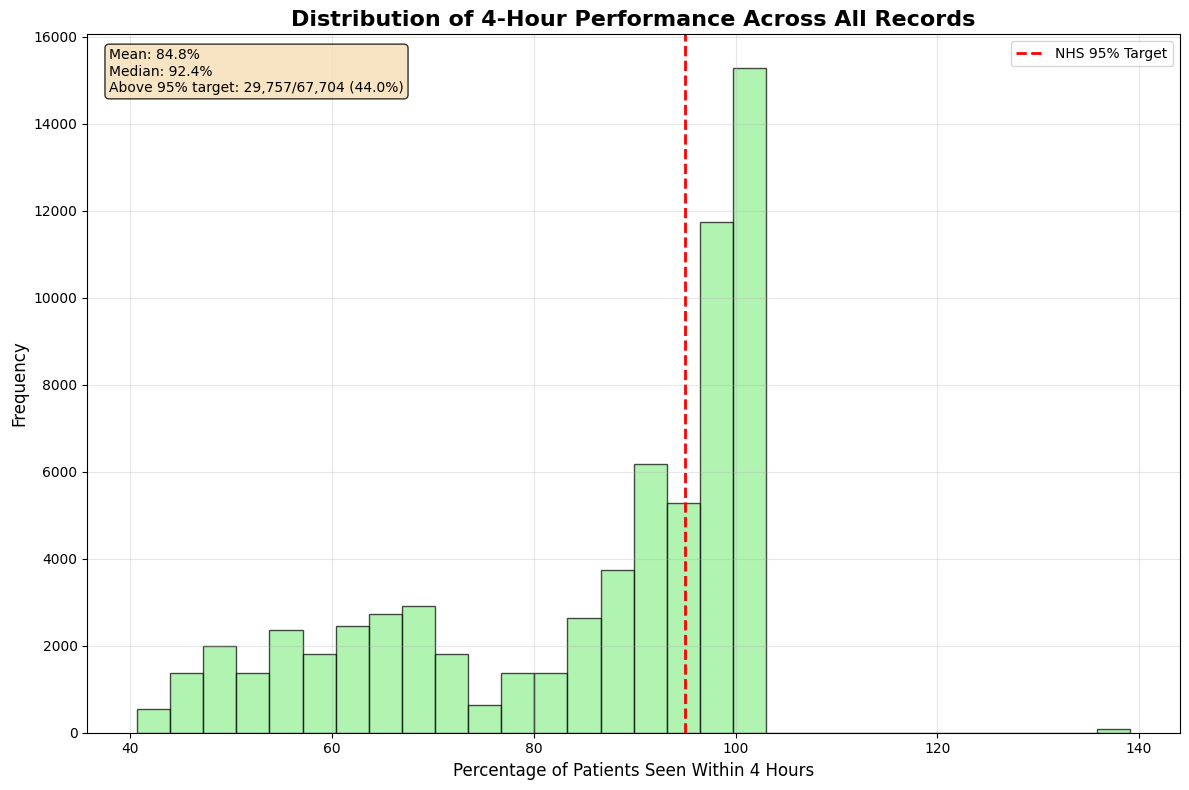

4-Hour Performance Summary:
  Average performance: 84.8%
  Records meeting 95% target: 29,757 out of 67,704 (44.0%)
  Best performance: 139.1%
  Worst performance: 40.7%


In [12]:
# 4-Hour Performance Target Analysis
df['Percentage_Within_4Hours'] = (df['NumberWithin4HoursAll'] / df['NumberOfAttendancesAll'] * 100).fillna(0)

plt.figure(figsize=(12, 8))
plt.hist(df['Percentage_Within_4Hours'], bins=30, color='lightgreen', alpha=0.7, edgecolor='black')
plt.axvline(x=95, color='red', linestyle='--', linewidth=2, label='NHS 95% Target')
plt.title('Distribution of 4-Hour Performance Across All Records', fontsize=16, fontweight='bold')
plt.xlabel('Percentage of Patients Seen Within 4 Hours', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Add statistics box
mean_perf = df['Percentage_Within_4Hours'].mean()
median_perf = df['Percentage_Within_4Hours'].median()
above_target = (df['Percentage_Within_4Hours'] >= 95).sum()
total_records = len(df)

textstr = f'Mean: {mean_perf:.1f}%\nMedian: {median_perf:.1f}%\nAbove 95% target: {above_target:,}/{total_records:,} ({above_target/total_records*100:.1f}%)'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

print(f"4-Hour Performance Summary:")
print(f"  Average performance: {mean_perf:.1f}%")
print(f"  Records meeting 95% target: {above_target:,} out of {total_records:,} ({above_target/total_records*100:.1f}%)")
print(f"  Best performance: {df['Percentage_Within_4Hours'].max():.1f}%")
print(f"  Worst performance: {df['Percentage_Within_4Hours'].min():.1f}%")

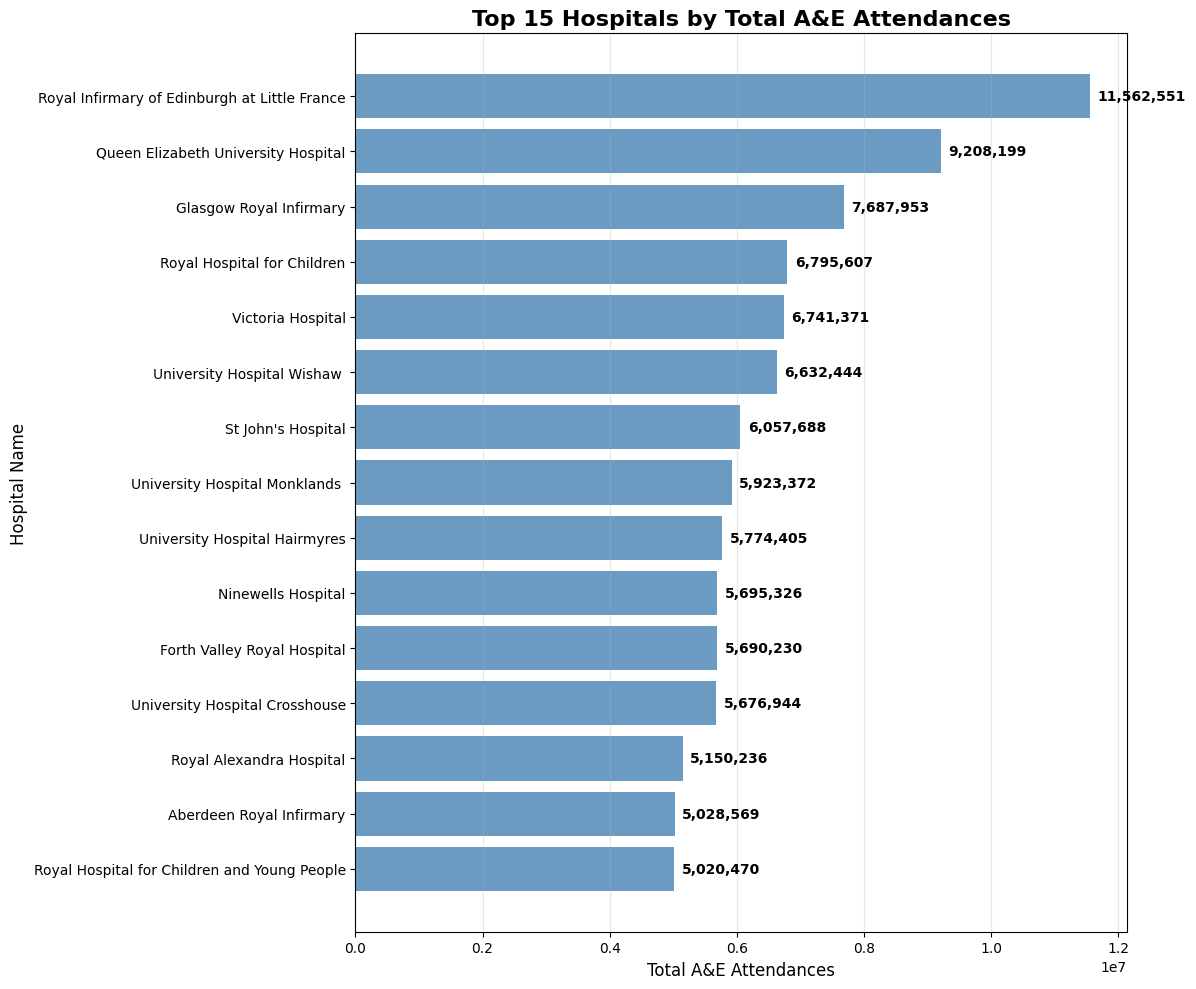

Top 5 Busiest Hospitals:
  1. Victoria Hospital: 6,741,371 attendances
  2. Royal Hospital for Children: 6,795,607 attendances
  3. Glasgow Royal Infirmary: 7,687,953 attendances
  4. Queen Elizabeth University Hospital: 9,208,199 attendances
  5. Royal Infirmary of Edinburgh at Little France: 11,562,551 attendances


In [13]:
# Top 15 Hospitals by Total A&E Attendances
hospital_volumes = df.groupby('HospitalName')['NumberOfAttendancesAll'].sum().sort_values(ascending=True).tail(15)

plt.figure(figsize=(12, 10))
bars = plt.barh(hospital_volumes.index, hospital_volumes.values, color='steelblue', alpha=0.8)
plt.title('Top 15 Hospitals by Total A&E Attendances', fontsize=16, fontweight='bold')
plt.xlabel('Total A&E Attendances', fontsize=12)
plt.ylabel('Hospital Name', fontsize=12)

# Add value labels on bars
for i, (hospital, volume) in enumerate(hospital_volumes.items()):
    plt.text(volume + max(hospital_volumes.values) * 0.01, i, f'{volume:,.0f}', 
             va='center', fontsize=10, fontweight='bold')

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Top 5 Busiest Hospitals:")
for i, (hospital, volume) in enumerate(hospital_volumes.tail(5).items(), 1):
    print(f"  {i}. {hospital}: {volume:,} attendances")

TypeError: can only concatenate str (not "int") to str

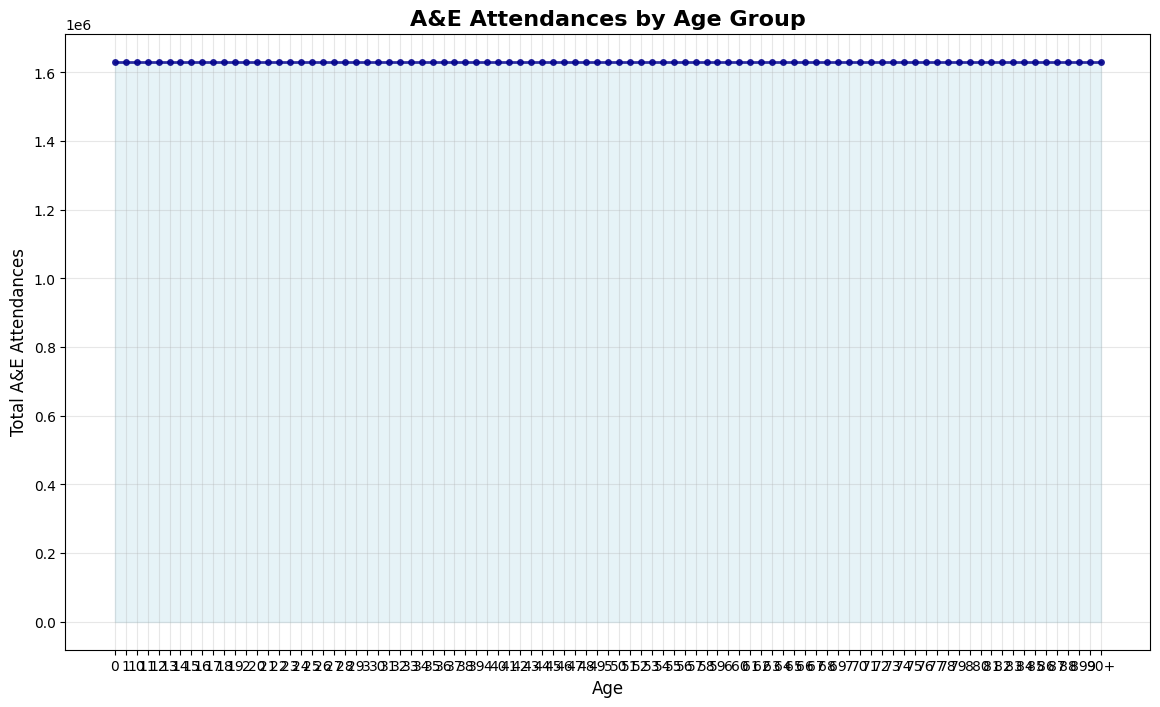

In [14]:
# Age Distribution of A&E Attendances
plt.figure(figsize=(14, 8))
age_data = df.groupby('Age')['NumberOfAttendancesAll'].sum().reset_index()

plt.plot(age_data['Age'], age_data['NumberOfAttendancesAll'], marker='o', linewidth=2, 
         markersize=4, color='darkblue', alpha=0.8)
plt.fill_between(age_data['Age'], age_data['NumberOfAttendancesAll'], alpha=0.3, color='lightblue')

plt.title('A&E Attendances by Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Total A&E Attendances', fontsize=12)
plt.grid(alpha=0.3)

# Highlight peak age groups
max_age = age_data.loc[age_data['NumberOfAttendancesAll'].idxmax(), 'Age']
max_attendances = age_data['NumberOfAttendancesAll'].max()
plt.annotate(f'Peak: Age {max_age}\n{max_attendances:,} attendances', 
             xy=(max_age, max_attendances), xytext=(max_age+10, max_attendances*0.9),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.tight_layout()
plt.show()

print(f"Age-related Statistics:")
print(f"  Peak age for A&E visits: {max_age} years ({max_attendances:,} attendances)")
print(f"  Age range in dataset: {age_data['Age'].min()} - {age_data['Age'].max()} years")
print(f"  Total age groups: {len(age_data)}")

# Top 5 age groups
top_ages = age_data.nlargest(5, 'NumberOfAttendancesAll')
print(f"  Top 5 age groups by attendances:")
for _, row in top_ages.iterrows():
    print(f"    Age {row['Age']}: {row['NumberOfAttendancesAll']:,} attendances")

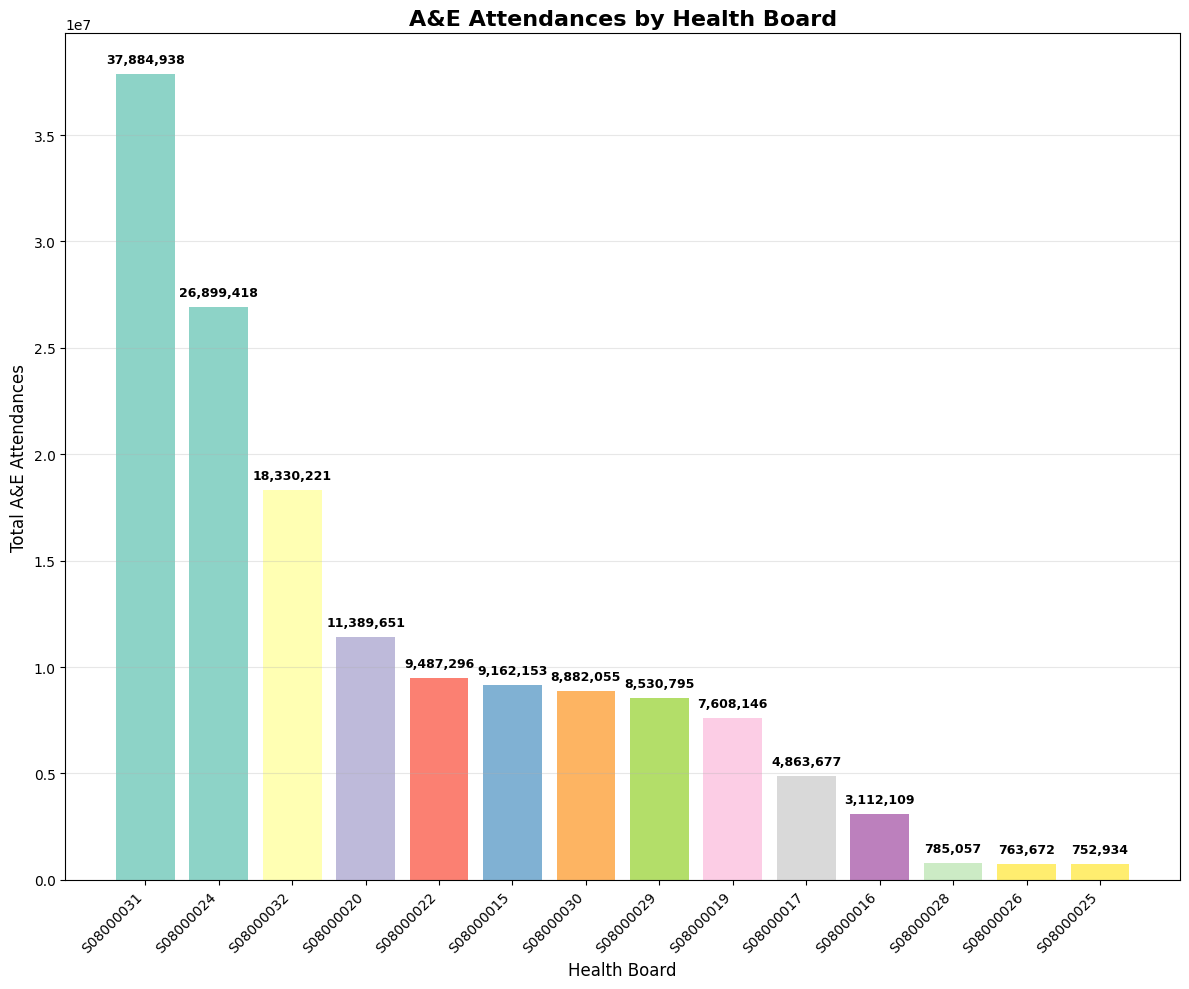

Health Board Statistics:
  Total Health Boards: 14
  Largest Health Board: S08000031 (37,884,938 attendances)
  Smallest Health Board: S08000025 (752,934 attendances)
  Average attendances per Health Board: 10,603,723


In [15]:
# Geographic Distribution - Health Board Analysis
health_board_data = df.groupby('HealthBoard')['NumberOfAttendancesAll'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 10))
bars = plt.bar(range(len(health_board_data)), health_board_data.values, 
               color=plt.cm.Set3(np.linspace(0, 1, len(health_board_data))))
plt.title('A&E Attendances by Health Board', fontsize=16, fontweight='bold')
plt.xlabel('Health Board', fontsize=12)
plt.ylabel('Total A&E Attendances', fontsize=12)
plt.xticks(range(len(health_board_data)), health_board_data.index, rotation=45, ha='right')

# Add value labels on top of bars
for i, (board, volume) in enumerate(health_board_data.items()):
    plt.text(i, volume + max(health_board_data.values) * 0.01, f'{volume:,.0f}', 
             ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Health Board Statistics:")
print(f"  Total Health Boards: {len(health_board_data)}")
print(f"  Largest Health Board: {health_board_data.index[0]} ({health_board_data.iloc[0]:,} attendances)")
print(f"  Smallest Health Board: {health_board_data.index[-1]} ({health_board_data.iloc[-1]:,} attendances)")
print(f"  Average attendances per Health Board: {health_board_data.mean():,.0f}")

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0          0
1          1
2          2
3          3
4          4
        ... 
67699     86
67700     87
67701     88
67702     89
67703    90+
Name: Age, Length: 67704, dtype: object

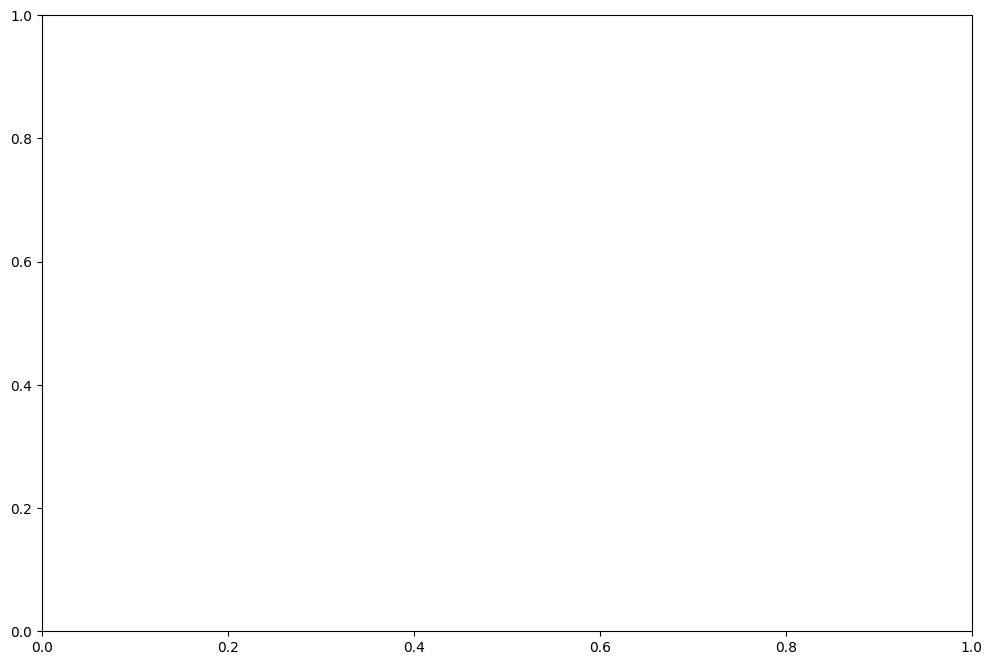

In [16]:
# Population vs A&E Attendances Correlation
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Population'], df['NumberOfAttendancesAll'], 
                     alpha=0.6, c=df['Age'], cmap='viridis', s=30)
plt.colorbar(scatter, label='Age')
plt.title('A&E Attendances vs Population (colored by Age)', fontsize=16, fontweight='bold')
plt.xlabel('Population', fontsize=12)
plt.ylabel('Number of A&E Attendances', fontsize=12)
plt.grid(alpha=0.3)

# Calculate and display correlation
correlation = df['Population'].corr(df['NumberOfAttendancesAll'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=plt.gca().transAxes, 
         fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

print(f"Population vs Attendances Analysis:")
print(f"  Correlation coefficient: {correlation:.3f}")
if abs(correlation) > 0.7:
    strength = "Strong"
elif abs(correlation) > 0.4:
    strength = "Moderate"
else:
    strength = "Weak"
print(f"  Correlation strength: {strength}")
print(f"  Population range: {df['Population'].min():.1f} - {df['Population'].max():.1f}")
print(f"  Mean population: {df['Population'].mean():.1f}")

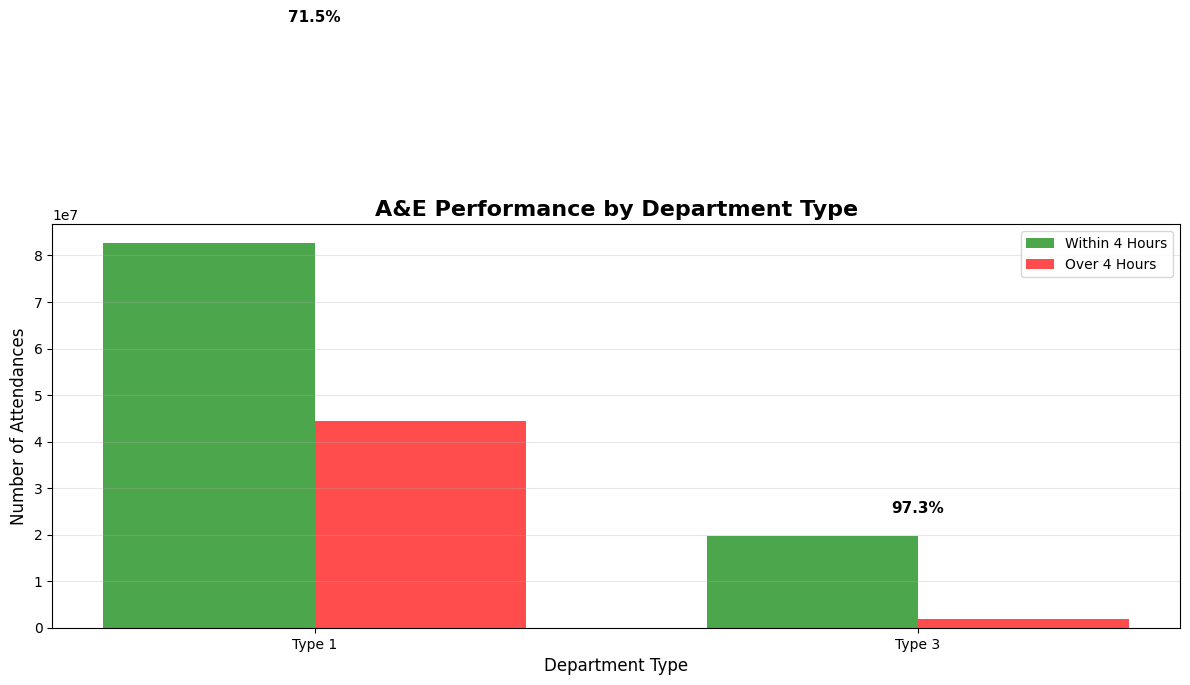

Department Performance Summary:
  Type 1:
    Total attendances: 127,031,177.0
    Within 4 hours: 82,616,898.0 (71.5%)
    Over 4 hours: 44,414,279.0
  Type 3:
    Total attendances: 21,420,945.0
    Within 4 hours: 19,642,805.0 (97.3%)
    Over 4 hours: 1,778,140.0


In [17]:
# Department Type Performance Comparison
dept_performance = df.groupby('DepartmentType').agg({
    'NumberOfAttendancesAll': 'sum',
    'NumberWithin4HoursAll': 'sum',
    'NumberOver4HoursAll': 'sum',
    'Percentage_Within_4Hours': 'mean'
}).round(2)

plt.figure(figsize=(12, 8))
x = np.arange(len(dept_performance.index))
width = 0.35

bars1 = plt.bar(x - width/2, dept_performance['NumberWithin4HoursAll'], width, 
                label='Within 4 Hours', color='green', alpha=0.7)
bars2 = plt.bar(x + width/2, dept_performance['NumberOver4HoursAll'], width, 
                label='Over 4 Hours', color='red', alpha=0.7)

plt.title('A&E Performance by Department Type', fontsize=16, fontweight='bold')
plt.xlabel('Department Type', fontsize=12)
plt.ylabel('Number of Attendances', fontsize=12)
plt.xticks(x, dept_performance.index)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Add percentage labels
for i, (dept, row) in enumerate(dept_performance.iterrows()):
    total_height = row['NumberWithin4HoursAll'] + row['NumberOver4HoursAll']
    plt.text(i, total_height + max(dept_performance['NumberOfAttendancesAll']) * 0.02, 
             f'{row["Percentage_Within_4Hours"]:.1f}%', ha='center', va='bottom', 
             fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print(f"Department Performance Summary:")
for dept, row in dept_performance.iterrows():
    print(f"  {dept}:")
    print(f"    Total attendances: {row['NumberOfAttendancesAll']:,}")
    print(f"    Within 4 hours: {row['NumberWithin4HoursAll']:,} ({row['Percentage_Within_4Hours']:.1f}%)")
    print(f"    Over 4 hours: {row['NumberOver4HoursAll']:,}")

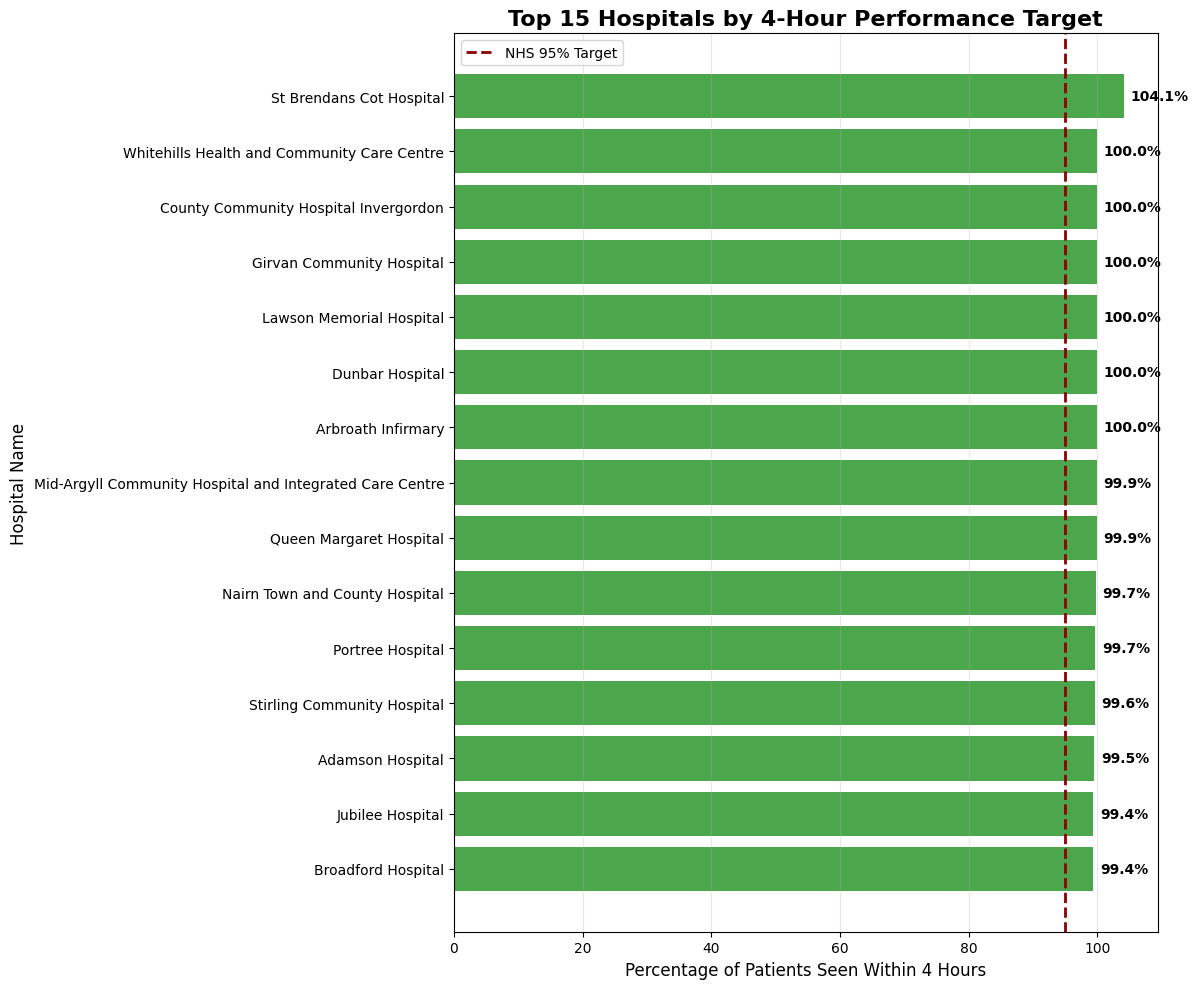

Performance Summary (Top 15 Hospitals):
  Hospitals meeting 95% target: 15/15
  Best performing hospital: St Brendans Cot Hospital (104.1%)
  Average performance: 100.1%


In [18]:
# Hospital Performance Ranking (4-Hour Target)
hospital_performance = df.groupby('HospitalName').agg({
    'NumberOfAttendancesAll': 'sum',
    'NumberWithin4HoursAll': 'sum'
}).reset_index()
hospital_performance['Performance_Percentage'] = (hospital_performance['NumberWithin4HoursAll'] / 
                                                  hospital_performance['NumberOfAttendancesAll'] * 100)
hospital_performance = hospital_performance.sort_values('Performance_Percentage', ascending=True).tail(15)

plt.figure(figsize=(12, 10))
colors = ['red' if x < 95 else 'green' for x in hospital_performance['Performance_Percentage']]
bars = plt.barh(hospital_performance['HospitalName'], hospital_performance['Performance_Percentage'], 
                color=colors, alpha=0.7)

plt.axvline(x=95, color='darkred', linestyle='--', linewidth=2, label='NHS 95% Target')
plt.title('Top 15 Hospitals by 4-Hour Performance Target', fontsize=16, fontweight='bold')
plt.xlabel('Percentage of Patients Seen Within 4 Hours', fontsize=12)
plt.ylabel('Hospital Name', fontsize=12)
plt.legend()
plt.grid(axis='x', alpha=0.3)

# Add percentage labels
for i, (hospital, perf) in enumerate(zip(hospital_performance['HospitalName'], 
                                        hospital_performance['Performance_Percentage'])):
    plt.text(perf + 1, i, f'{perf:.1f}%', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

meeting_target = (hospital_performance['Performance_Percentage'] >= 95).sum()
print(f"Performance Summary (Top 15 Hospitals):")
print(f"  Hospitals meeting 95% target: {meeting_target}/15")
print(f"  Best performing hospital: {hospital_performance.iloc[-1]['HospitalName']} ({hospital_performance.iloc[-1]['Performance_Percentage']:.1f}%)")
print(f"  Average performance: {hospital_performance['Performance_Percentage'].mean():.1f}%")

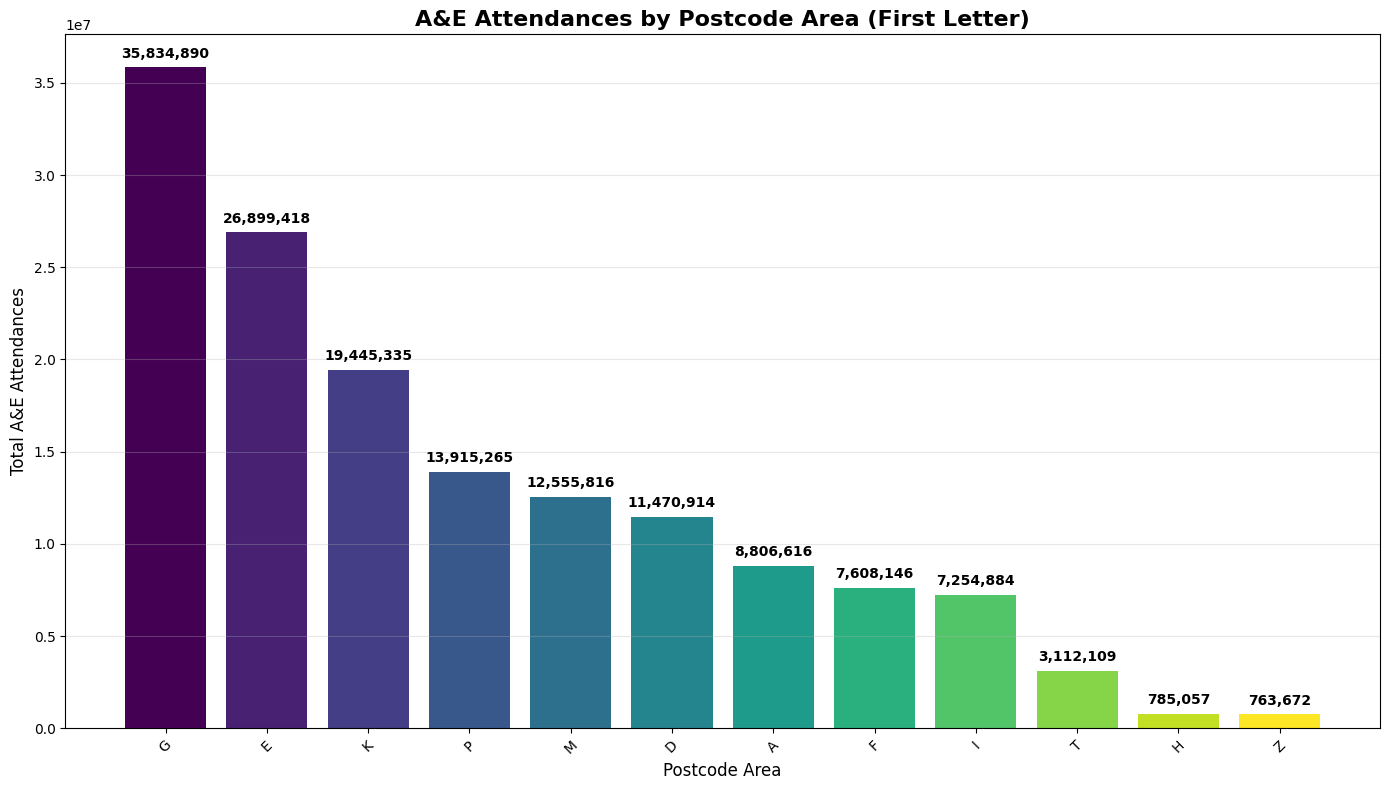

Postcode Area Statistics:
  Total postcode areas: 12
  Top 5 postcode areas:
    1. G: 35,834,890 attendances
    2. E: 26,899,418 attendances
    3. K: 19,445,335 attendances
    4. P: 13,915,265 attendances
    5. M: 12,555,816 attendances
  Unique postcodes in dataset: 61


In [19]:
# Postcode Area Analysis (First Letter)
df['PostcodeArea'] = df['Postcode'].str[0]
postcode_analysis = df.groupby('PostcodeArea')['NumberOfAttendancesAll'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
bars = plt.bar(postcode_analysis.index, postcode_analysis.values, 
               color=plt.cm.viridis(np.linspace(0, 1, len(postcode_analysis))))
plt.title('A&E Attendances by Postcode Area (First Letter)', fontsize=16, fontweight='bold')
plt.xlabel('Postcode Area', fontsize=12)
plt.ylabel('Total A&E Attendances', fontsize=12)

# Add value labels on top of bars
for i, (area, volume) in enumerate(postcode_analysis.items()):
    plt.text(i, volume + max(postcode_analysis.values) * 0.01, f'{volume:,.0f}', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Postcode Area Statistics:")
print(f"  Total postcode areas: {len(postcode_analysis)}")
print(f"  Top 5 postcode areas:")
for i, (area, volume) in enumerate(postcode_analysis.head().items(), 1):
    print(f"    {i}. {area}: {volume:,} attendances")
print(f"  Unique postcodes in dataset: {df['Postcode'].nunique()}")

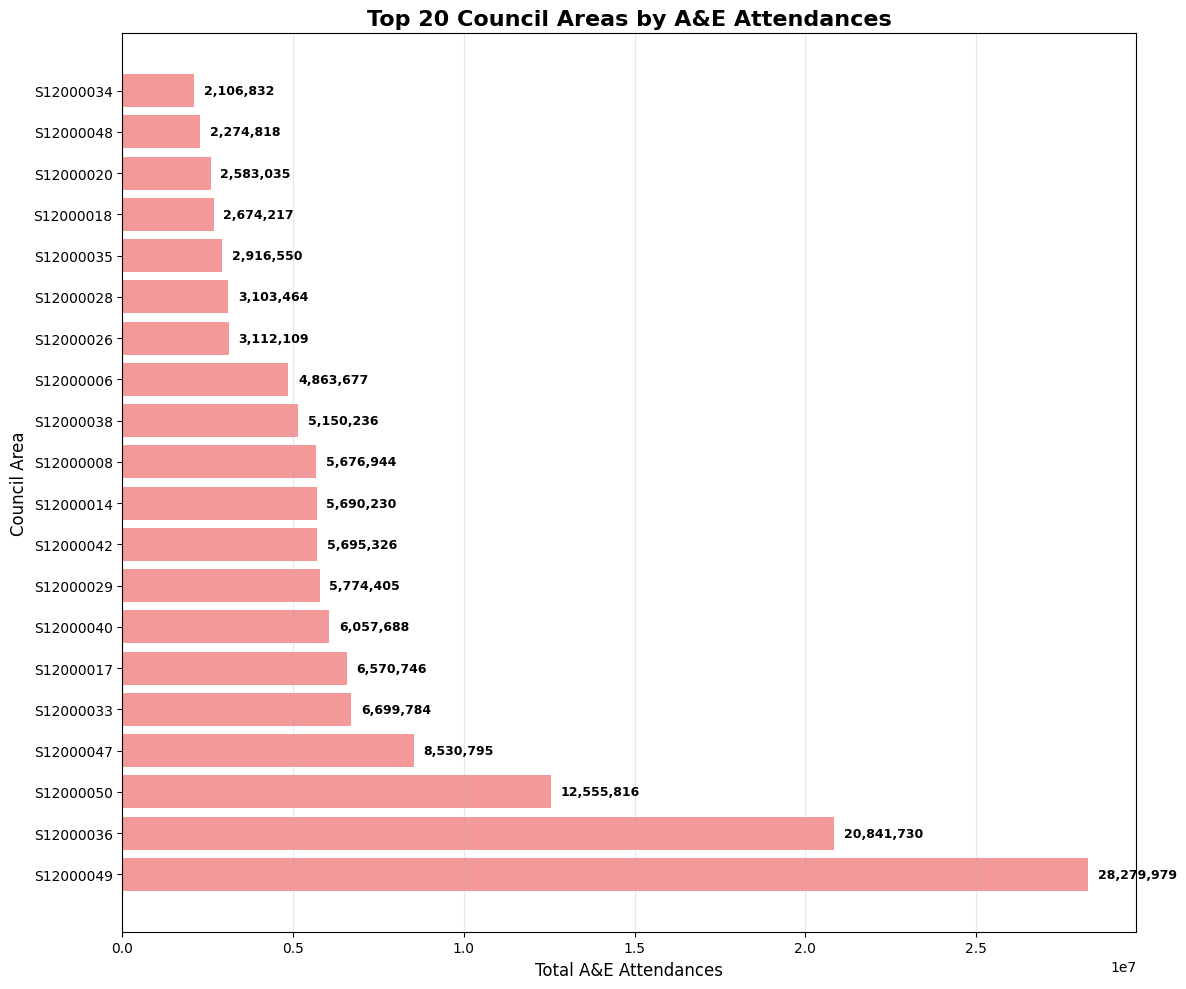

Council Area Statistics:
  Total council areas: 27
  Showing top 20 of 27
  Largest council area: S12000049 (28,279,979 attendances)
  Average attendances per council: 5,498,227


In [20]:
# Council Area Distribution Analysis
council_data = df.groupby('CouncilArea')['NumberOfAttendancesAll'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 10))
bars = plt.barh(range(len(council_data)), council_data.values, color='lightcoral', alpha=0.8)
plt.title('Top 20 Council Areas by A&E Attendances', fontsize=16, fontweight='bold')
plt.xlabel('Total A&E Attendances', fontsize=12)
plt.ylabel('Council Area', fontsize=12)
plt.yticks(range(len(council_data)), council_data.index)

# Add value labels
for i, (area, volume) in enumerate(council_data.items()):
    plt.text(volume + max(council_data.values) * 0.01, i, f'{volume:,.0f}', 
             va='center', fontsize=9, fontweight='bold')

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

total_councils = df['CouncilArea'].nunique()
print(f"Council Area Statistics:")
print(f"  Total council areas: {total_councils}")
print(f"  Showing top 20 of {total_councils}")
print(f"  Largest council area: {council_data.index[0]} ({council_data.iloc[0]:,} attendances)")
print(f"  Average attendances per council: {df.groupby('CouncilArea')['NumberOfAttendancesAll'].sum().mean():,.0f}")

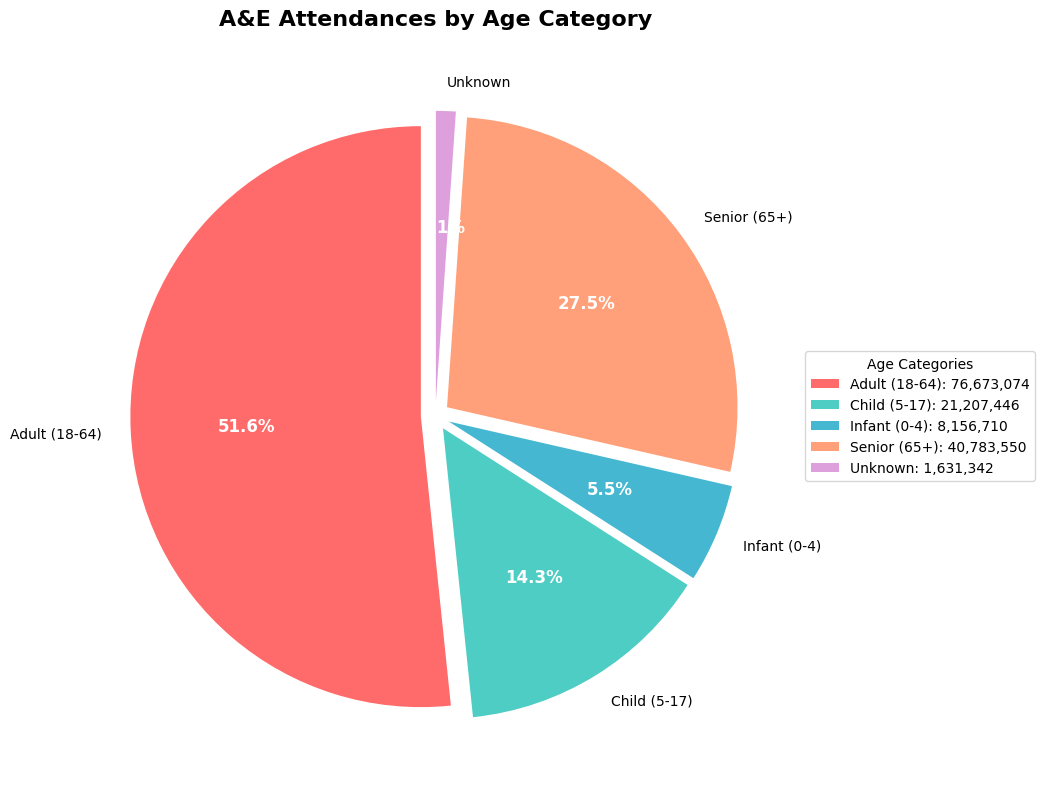

Age Category Breakdown:
  Adult (18-64): 76,673,074 attendances (51.6%)
  Child (5-17): 21,207,446 attendances (14.3%)
  Infant (0-4): 8,156,710 attendances (5.5%)
  Senior (65+): 40,783,550 attendances (27.5%)
  Unknown: 1,631,342 attendances (1.1%)


In [21]:
# Age Group Categorization Analysis
def categorize_age(age):
    try:
        age = float(age)  # Convert to numeric, handle potential string values
        if pd.isna(age):
            return 'Unknown'
        elif age <= 4:
            return 'Infant (0-4)'
        elif age <= 17:
            return 'Child (5-17)'
        elif age <= 64:
            return 'Adult (18-64)'
        else:
            return 'Senior (65+)'
    except (ValueError, TypeError):
        return 'Unknown'

df['AgeCategory'] = df['Age'].apply(categorize_age)
age_category_data = df.groupby('AgeCategory')['NumberOfAttendancesAll'].sum()

plt.figure(figsize=(12, 8))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#DDA0DD']
wedges, texts, autotexts = plt.pie(age_category_data.values, labels=age_category_data.index, 
                                  autopct='%1.1f%%', startangle=90, colors=colors[:len(age_category_data)],
                                  explode=[0.05] * len(age_category_data))

# Enhance the pie chart
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

plt.title('A&E Attendances by Age Category', fontsize=16, fontweight='bold', pad=20)

# Add a legend with counts
legend_labels = [f'{cat}: {count:,}' for cat, count in age_category_data.items()]
plt.legend(wedges, legend_labels, title="Age Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

print(f"Age Category Breakdown:")
for category, count in age_category_data.items():
    percentage = (count / age_category_data.sum()) * 100
    print(f"  {category}: {count:,} attendances ({percentage:.1f}%)")

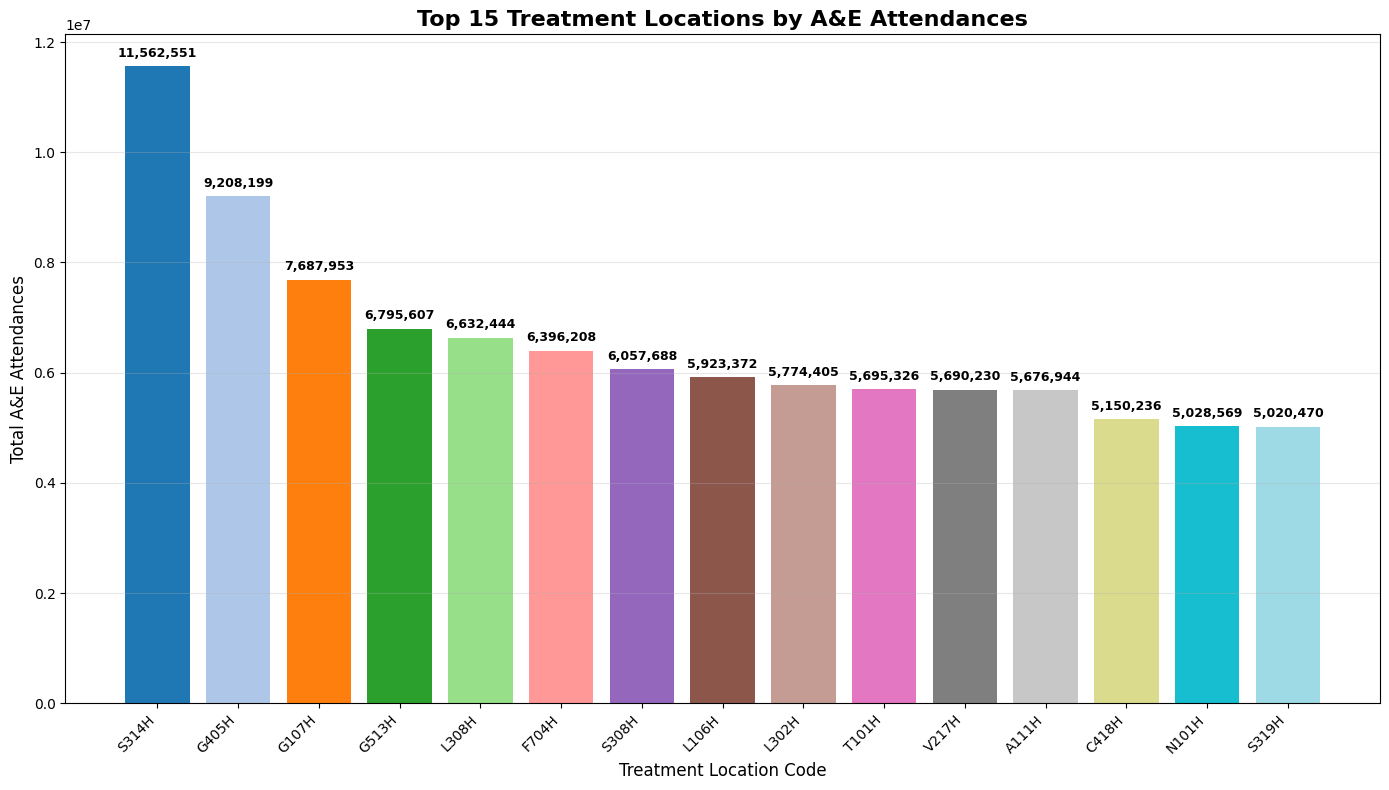

Treatment Location Statistics:
  Total treatment locations: 62
  Showing top 15 locations
  Busiest location: S314H (11,562,551 attendances)
  Average attendances per location: 2,394,389


In [22]:
# Treatment Location Distribution
treatment_locations = df.groupby('TreatmentLocation')['NumberOfAttendancesAll'].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(14, 8))
bars = plt.bar(range(len(treatment_locations)), treatment_locations.values, 
               color=plt.cm.tab20(np.linspace(0, 1, len(treatment_locations))))
plt.title('Top 15 Treatment Locations by A&E Attendances', fontsize=16, fontweight='bold')
plt.xlabel('Treatment Location Code', fontsize=12)
plt.ylabel('Total A&E Attendances', fontsize=12)
plt.xticks(range(len(treatment_locations)), treatment_locations.index, rotation=45, ha='right')

# Add value labels on top of bars
for i, (location, volume) in enumerate(treatment_locations.items()):
    plt.text(i, volume + max(treatment_locations.values) * 0.01, f'{volume:,.0f}', 
             ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

total_locations = df['TreatmentLocation'].nunique()
print(f"Treatment Location Statistics:")
print(f"  Total treatment locations: {total_locations}")
print(f"  Showing top 15 locations")
print(f"  Busiest location: {treatment_locations.index[0]} ({treatment_locations.iloc[0]:,} attendances)")
print(f"  Average attendances per location: {df.groupby('TreatmentLocation')['NumberOfAttendancesAll'].sum().mean():,.0f}")

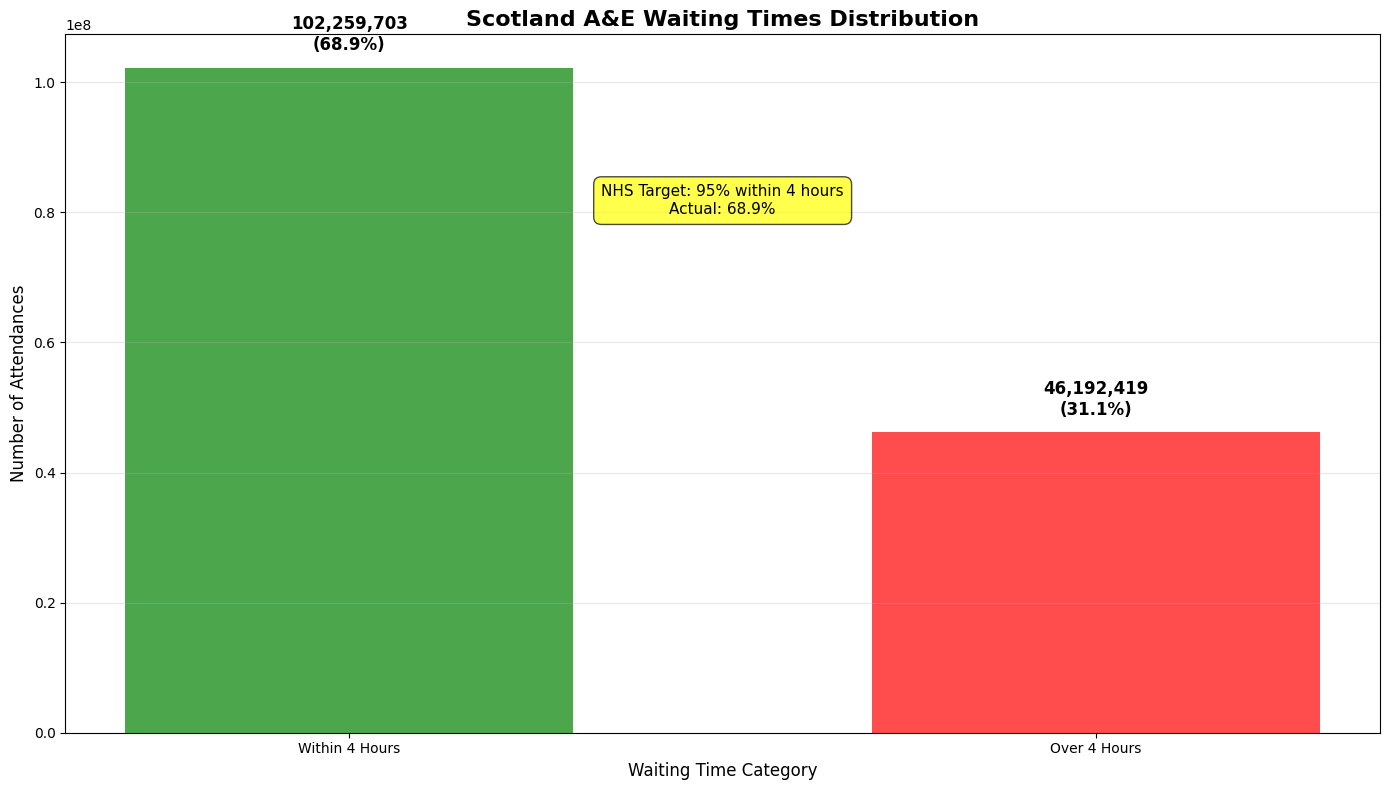

National Waiting Time Performance:
  Total attendances: 148,452,122
  Within 4 hours: 102,259,703 (68.9%)
  Over 4 hours: 46,192,419 (31.1%)
  Performance vs NHS target (95%): -26.1 percentage points


In [23]:
# Detailed Waiting Time Distribution
plt.figure(figsize=(14, 8))

# Create bins for waiting time visualization
total_attendances = df['NumberOfAttendancesAll'].sum()
within_4h = df['NumberWithin4HoursAll'].sum()
over_4h = df['NumberOver4HoursAll'].sum()

categories = ['Within 4 Hours', 'Over 4 Hours']
values = [within_4h, over_4h]
colors = ['green', 'red']

bars = plt.bar(categories, values, color=colors, alpha=0.7, width=0.6)
plt.title('Scotland A&E Waiting Times Distribution', fontsize=16, fontweight='bold')
plt.ylabel('Number of Attendances', fontsize=12)
plt.xlabel('Waiting Time Category', fontsize=12)

# Add percentage and value labels
for i, (cat, val) in enumerate(zip(categories, values)):
    percentage = (val / total_attendances) * 100
    plt.text(i, val + max(values) * 0.02, f'{val:,.0f}\n({percentage:.1f}%)', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add NHS target line annotation
plt.text(0.5, max(values) * 0.8, f'NHS Target: 95% within 4 hours\nActual: {(within_4h/total_attendances)*100:.1f}%', 
         ha='center', va='center', fontsize=11, 
         bbox=dict(boxstyle="round,pad=0.5", facecolor="yellow", alpha=0.7))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"National Waiting Time Performance:")
print(f"  Total attendances: {total_attendances:,}")
print(f"  Within 4 hours: {within_4h:,} ({(within_4h/total_attendances)*100:.1f}%)")
print(f"  Over 4 hours: {over_4h:,} ({(over_4h/total_attendances)*100:.1f}%)")
print(f"  Performance vs NHS target (95%): {(within_4h/total_attendances)*100 - 95:.1f} percentage points")

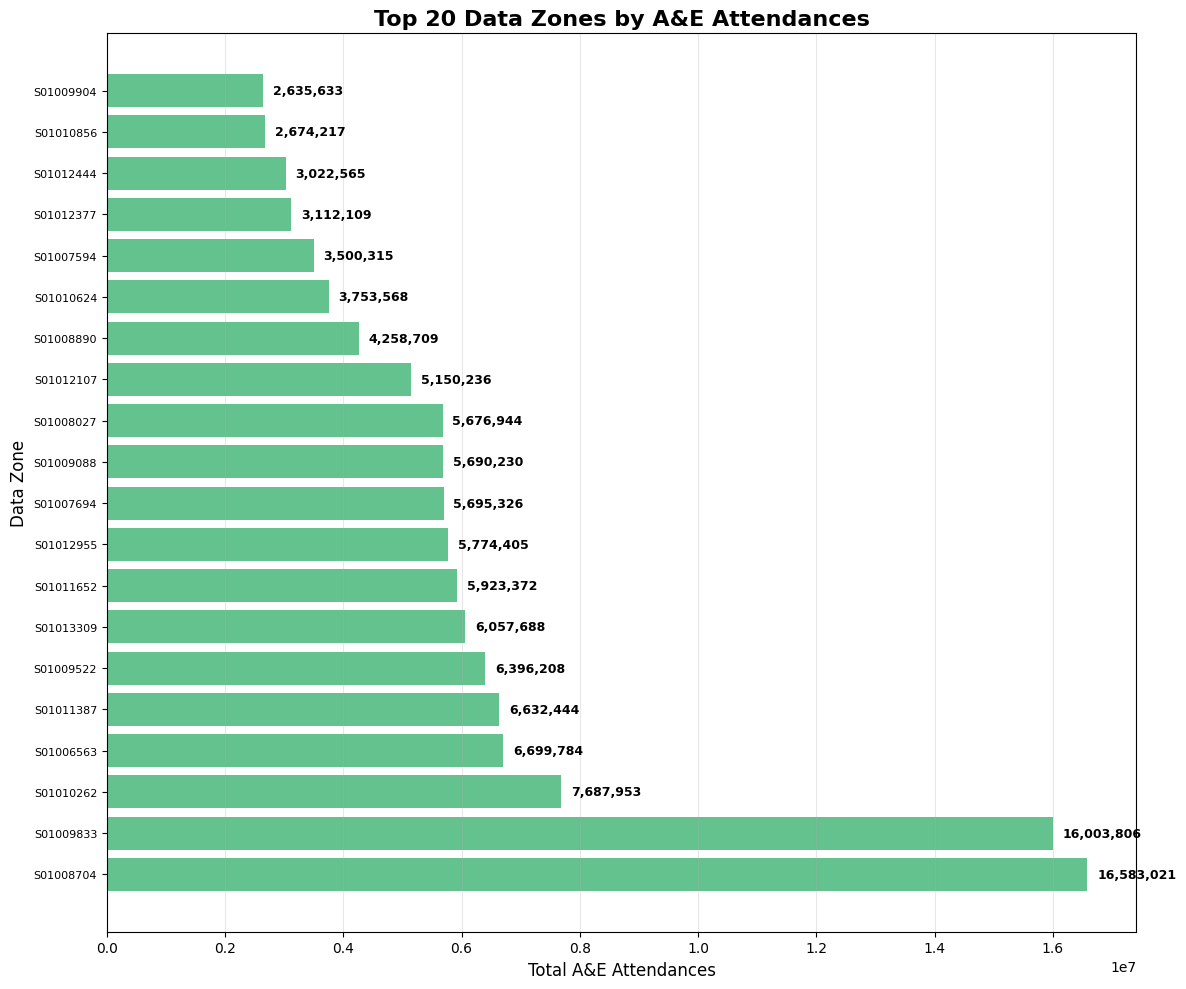

Data Zone Statistics:
  Total data zones: 59
  Showing top 20 zones
  Busiest data zone: S01008704 (16,583,021 attendances)
  Average attendances per data zone: 2,516,138


In [24]:
# Data Zone Analysis - Top Zones by Attendances
datazone_analysis = df.groupby('DataZone')['NumberOfAttendancesAll'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 10))
bars = plt.barh(range(len(datazone_analysis)), datazone_analysis.values, color='mediumseagreen', alpha=0.8)
plt.title('Top 20 Data Zones by A&E Attendances', fontsize=16, fontweight='bold')
plt.xlabel('Total A&E Attendances', fontsize=12)
plt.ylabel('Data Zone', fontsize=12)
plt.yticks(range(len(datazone_analysis)), datazone_analysis.index, fontsize=8)

# Add value labels
for i, (zone, volume) in enumerate(datazone_analysis.items()):
    plt.text(volume + max(datazone_analysis.values) * 0.01, i, f'{volume:,.0f}', 
             va='center', fontsize=9, fontweight='bold')

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

total_datazones = df['DataZone'].nunique()
print(f"Data Zone Statistics:")
print(f"  Total data zones: {total_datazones}")
print(f"  Showing top 20 zones")
print(f"  Busiest data zone: {datazone_analysis.index[0]} ({datazone_analysis.iloc[0]:,} attendances)")
print(f"  Average attendances per data zone: {df.groupby('DataZone')['NumberOfAttendancesAll'].sum().mean():,.0f}")

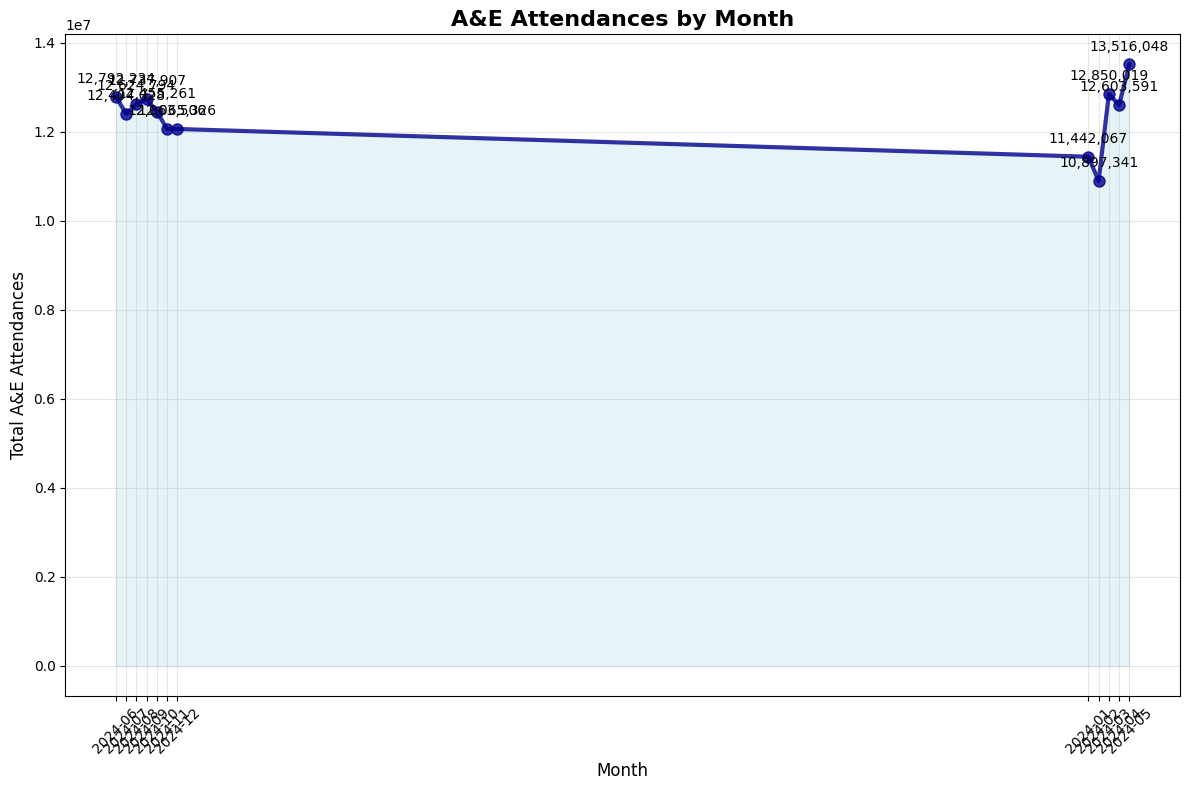

Monthly Trends Analysis:
  Months in dataset: 12
  Peak month: 202505 (13,516,048 attendances)
  Lowest month: 202502 (10,897,341 attendances)
  Variation: 21.2%


In [25]:
# Monthly Trends Analysis
monthly_data = df.groupby('Month')['NumberOfAttendancesAll'].sum()

plt.figure(figsize=(12, 8))
plt.plot(monthly_data.index, monthly_data.values, marker='o', linewidth=3, 
         markersize=8, color='darkblue', alpha=0.8)
plt.fill_between(monthly_data.index, monthly_data.values, alpha=0.3, color='lightblue')

plt.title('A&E Attendances by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total A&E Attendances', fontsize=12)
plt.grid(alpha=0.3)

# Format x-axis to show month names
plt.xticks(monthly_data.index, [f"2024-{str(m)[4:6]}" for m in monthly_data.index], rotation=45)

# Add value labels
for month, attendances in monthly_data.items():
    plt.annotate(f'{attendances:,.0f}', (month, attendances), 
                textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

print(f"Monthly Trends Analysis:")
print(f"  Months in dataset: {len(monthly_data)}")
if len(monthly_data) > 1:
    peak_month = monthly_data.idxmax()
    lowest_month = monthly_data.idxmin()
    print(f"  Peak month: {peak_month} ({monthly_data.max():,} attendances)")
    print(f"  Lowest month: {lowest_month} ({monthly_data.min():,} attendances)")
    print(f"  Variation: {((monthly_data.max() - monthly_data.min()) / monthly_data.mean() * 100):.1f}%")
else:
    print(f"  Single month dataset: {monthly_data.index[0]} ({monthly_data.iloc[0]:,} attendances)")

In [26]:
# Comprehensive Summary Statistics
print("="*80)
print("COMPREHENSIVE HEALTHCARE DATA SUMMARY")
print("="*80)

# Key metrics
total_attendances = df['NumberOfAttendancesAll'].sum()
total_within_4h = df['NumberWithin4HoursAll'].sum()
total_over_4h = df['NumberOver4HoursAll'].sum()
overall_performance = (total_within_4h / total_attendances) * 100

print(f"📊 OVERALL STATISTICS")
print(f"   Total A&E Attendances: {total_attendances:,}")
print(f"   Total Population Covered: {df['Population'].sum():,.0f}")
print(f"   Average Age: {pd.to_numeric(df['Age'], errors='coerce').mean():.1f} years")
print(f"   Records in Dataset: {len(df):,}")

print(f"\n🏥 HEALTHCARE INFRASTRUCTURE")
print(f"   Unique Hospitals: {df['HospitalName'].nunique()}")
print(f"   Health Boards: {df['HealthBoard'].nunique()}")
print(f"   Council Areas: {df['CouncilArea'].nunique()}")
print(f"   Treatment Locations: {df['TreatmentLocation'].nunique()}")
print(f"   Data Zones: {df['DataZone'].nunique()}")

print(f"\n⏰ PERFORMANCE METRICS")
print(f"   Overall 4-Hour Performance: {overall_performance:.1f}%")
print(f"   NHS Target (95%): {'✅ MET' if overall_performance >= 95 else '❌ NOT MET'}")
print(f"   Patients Within 4 Hours: {total_within_4h:,}")
print(f"   Patients Over 4 Hours: {total_over_4h:,}")

print(f"\n👥 DEMOGRAPHIC BREAKDOWN")
if 'AgeCategory' in df.columns:
    age_stats = df.groupby('AgeCategory')['NumberOfAttendancesAll'].sum()
    for category, count in age_stats.items():
        percentage = (count / total_attendances) * 100
        print(f"   {category}: {count:,} ({percentage:.1f}%)")
else:
    print(f"   Age range: {pd.to_numeric(df['Age'], errors='coerce').min():.0f} - {pd.to_numeric(df['Age'], errors='coerce').max():.0f} years")

print(f"\n🏢 DEPARTMENT PERFORMANCE")
dept_stats = df.groupby('DepartmentType').agg({
    'NumberOfAttendancesAll': 'sum',
}).join(
    df.groupby('DepartmentType').apply(
        lambda x: (x['NumberWithin4HoursAll'].sum() / x['NumberOfAttendancesAll'].sum() * 100)
    ).to_frame('Avg_Performance')
)
for dept, row in dept_stats.iterrows():
    print(f"   {dept}: {row['NumberOfAttendancesAll']:,} attendances ({row['Avg_Performance']:.1f}% within 4h)")

print(f"\n📍 GEOGRAPHIC SPREAD")
if 'PostcodeArea' in df.columns:
    print(f"   Postcode Areas: {df['PostcodeArea'].nunique()}")
else:
    print(f"   Postcode Areas: {df['Postcode'].str[0].nunique()}")
print(f"   Unique Postcodes: {df['Postcode'].nunique()}")

print("="*80)

COMPREHENSIVE HEALTHCARE DATA SUMMARY
📊 OVERALL STATISTICS
   Total A&E Attendances: 148,452,122
   Total Population Covered: 618,672
   Average Age: 44.5 years
   Records in Dataset: 67,704

🏥 HEALTHCARE INFRASTRUCTURE
   Unique Hospitals: 61
   Health Boards: 14
   Council Areas: 27
   Treatment Locations: 62
   Data Zones: 59

⏰ PERFORMANCE METRICS
   Overall 4-Hour Performance: 68.9%
   NHS Target (95%): ❌ NOT MET
   Patients Within 4 Hours: 102,259,703
   Patients Over 4 Hours: 46,192,419

👥 DEMOGRAPHIC BREAKDOWN
   Adult (18-64): 76,673,074 (51.6%)
   Child (5-17): 21,207,446 (14.3%)
   Infant (0-4): 8,156,710 (5.5%)
   Senior (65+): 40,783,550 (27.5%)
   Unknown: 1,631,342 (1.1%)

🏢 DEPARTMENT PERFORMANCE
   Type 1: 127,031,177.0 attendances (65.0% within 4h)
   Type 3: 21,420,945.0 attendances (91.7% within 4h)

📍 GEOGRAPHIC SPREAD
   Postcode Areas: 12
   Unique Postcodes: 61
